# March Mississippi/Alabama Storm Mode for Tornadoes (1996 - 2017)

### Read in the svrgis table

In [1]:
from svrimg.utils.get_tables import get_table
import pandas as pd

df_svrgis = get_table(which='svrgis', haz_type='tor', data_dir="../data/csvs/")

df_svrgis.head()

,om,tz,st,stf,stn,mag,inj,fat,loss,closs,...,f3,f4,fc,init_date,fmt_date,date_utc,yr,mo,dy,hr
uid,,,,,,,,,,,,,,,,,,,,,
199601011725z000000001,1,3,FL,12,1,0,0,0,0.04,0.0,...,0,0,0,1996-01-01-11:25:00,1/1/1996 11:25,1/1/1996 17:25,1996,1,1,17
199601030010z000000859,859,3,SC,45,1,0,0,0,0.03,0.0,...,0,0,0,1996-01-02-18:10:00,1/2/1996 18:10,1/3/1996 0:10,1996,1,3,0
199601030020z000000860,860,3,SC,45,2,0,0,0,0.00,0.0,...,0,0,0,1996-01-02-18:20:00,1/2/1996 18:20,1/3/1996 0:20,1996,1,3,0
199601031307z000000004,4,3,FL,12,2,1,9,0,1.20,0.0,...,0,0,0,1996-01-03-07:07:00,1/3/1996 7:07,1/3/1996 13:07,1996,1,3,13
199601031340z000000005,5,3,FL,12,3,0,0,0,0.10,0.0,...,0,0,0,1996-01-03-07:40:00,1/3/1996 7:40,1/3/1996 13:40,1996,1,3,13


# Select month and state

In [2]:
import datetime
import pandas as pd

df_sub = df_svrgis[(df_svrgis.mo == 3) & ((df_svrgis.st=='MS') | (df_svrgis.st=='AL'))].copy()
df_sub['date_utc'] = pd.to_datetime(df_sub.date_utc)

df_sub.head()

,om,tz,st,stf,stn,mag,inj,fat,loss,closs,...,f3,f4,fc,init_date,fmt_date,date_utc,yr,mo,dy,hr
uid,,,,,,,,,,,,,,,,,,,,,
199603060500z000000164,164,3,MS,28,9,1,5,0,0.15,0.0,...,0,0,0,1996-03-05-23:00:00,3/5/1996 23:00,1996-03-06 05:00:00,1996,3,6,5
199603060920z000000074,74,3,AL,1,4,1,0,0,0.10,0.0,...,0,0,0,1996-03-06-03:20:00,3/6/1996 3:20,1996-03-06 09:20:00,1996,3,6,9
199603060942z000000069,69,3,AL,1,5,3,40,4,8.00,0.0,...,0,0,0,1996-03-06-03:42:00,3/6/1996 3:42,1996-03-06 09:42:00,1996,3,6,9
199603061112z000000070,70,3,AL,1,6,1,0,0,1.25,0.0,...,0,0,0,1996-03-06-05:12:00,3/6/1996 5:12,1996-03-06 11:12:00,1996,3,6,11
199603061114z000000071,71,3,AL,1,7,1,0,0,0.70,0.0,...,0,0,0,1996-03-06-05:14:00,3/6/1996 5:14,1996-03-06 11:14:00,1996,3,6,11


# Request images from svrimg that correspond to the indexes of the December tornadoes in Louisiana

In [3]:
from svrimg.utils.get_images import request_images

file_locs = request_images(df_sub.index.values, haz_type='tor')

file_locs

{'199603060500z000000164': '../data/tor/1996/199603060500z000000164.png',
 '199603060920z000000074': '../data/tor/1996/199603060920z000000074.png',
 '199603060942z000000069': '../data/tor/1996/199603060942z000000069.png',
 '199603061112z000000070': '../data/tor/1996/199603061112z000000070.png',
 '199603061114z000000071': '../data/tor/1996/199603061114z000000071.png',
 '199603061116z000000072': '../data/tor/1996/199603061116z000000072.png',
 '199603061120z000000073': '../data/tor/1996/199603061120z000000073.png',
 '199603161915z000000075': '../data/tor/1996/199603161915z000000075.png',
 '199603182005z000000060': '../data/tor/1996/199603182005z000000060.png',
 '199603182015z000000062': '../data/tor/1996/199603182015z000000062.png',
 '199603182020z000000061': '../data/tor/1996/199603182020z000000061.png',
 '199603182130z000000351': '../data/tor/1996/199603182130z000000351.png',
 '199603182150z000000352': '../data/tor/1996/199603182150z000000352.png',
 '199603182216z000000357': '../data/to

# Read in the storm mode classifier

You can create your own in the notebook "Train_Model"

In [4]:
from tensorflow import keras

model = keras.models.load_model("../data/models/morph_model_v02.h5")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 134, 134, 32)      320       
                                                                 
 spatial_dropout2d (SpatialD  (None, 134, 134, 32)     0         
 ropout2D)                                                       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 44, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        18496     
                                                                 
 spatial_dropout2d_1 (Spatia  (None, 42, 42, 64)       0         
 lDropout2D)                                                     
                                                        

# Put images into an array and normalize them so the model can predict their class

In [5]:
from numpy import expand_dims
from svrimg.utils.get_images import get_img_list
import numpy as np

imgs = get_img_list(df_sub.index.values, haz_type="tor", keep_missing=True)
imgs = expand_dims(imgs, 3)
imgs = imgs / 80 #normalize

preds = model.predict(imgs)

lookup = {0:'Cellular', 1:'QLCS', 2:'Tropical', 3:'Other', 4:'Noise', 5:'Missing'}

for index, cls in lookup.items():

    df_sub[cls] = preds[:, index]

df_sub['Classification'] = [lookup[x] for x in np.argmax(preds, axis=1)]

7/7 [==============================] - 2s 11ms/step


# Plot the tornado locations with colors corresponding to the storm mode the model predicted

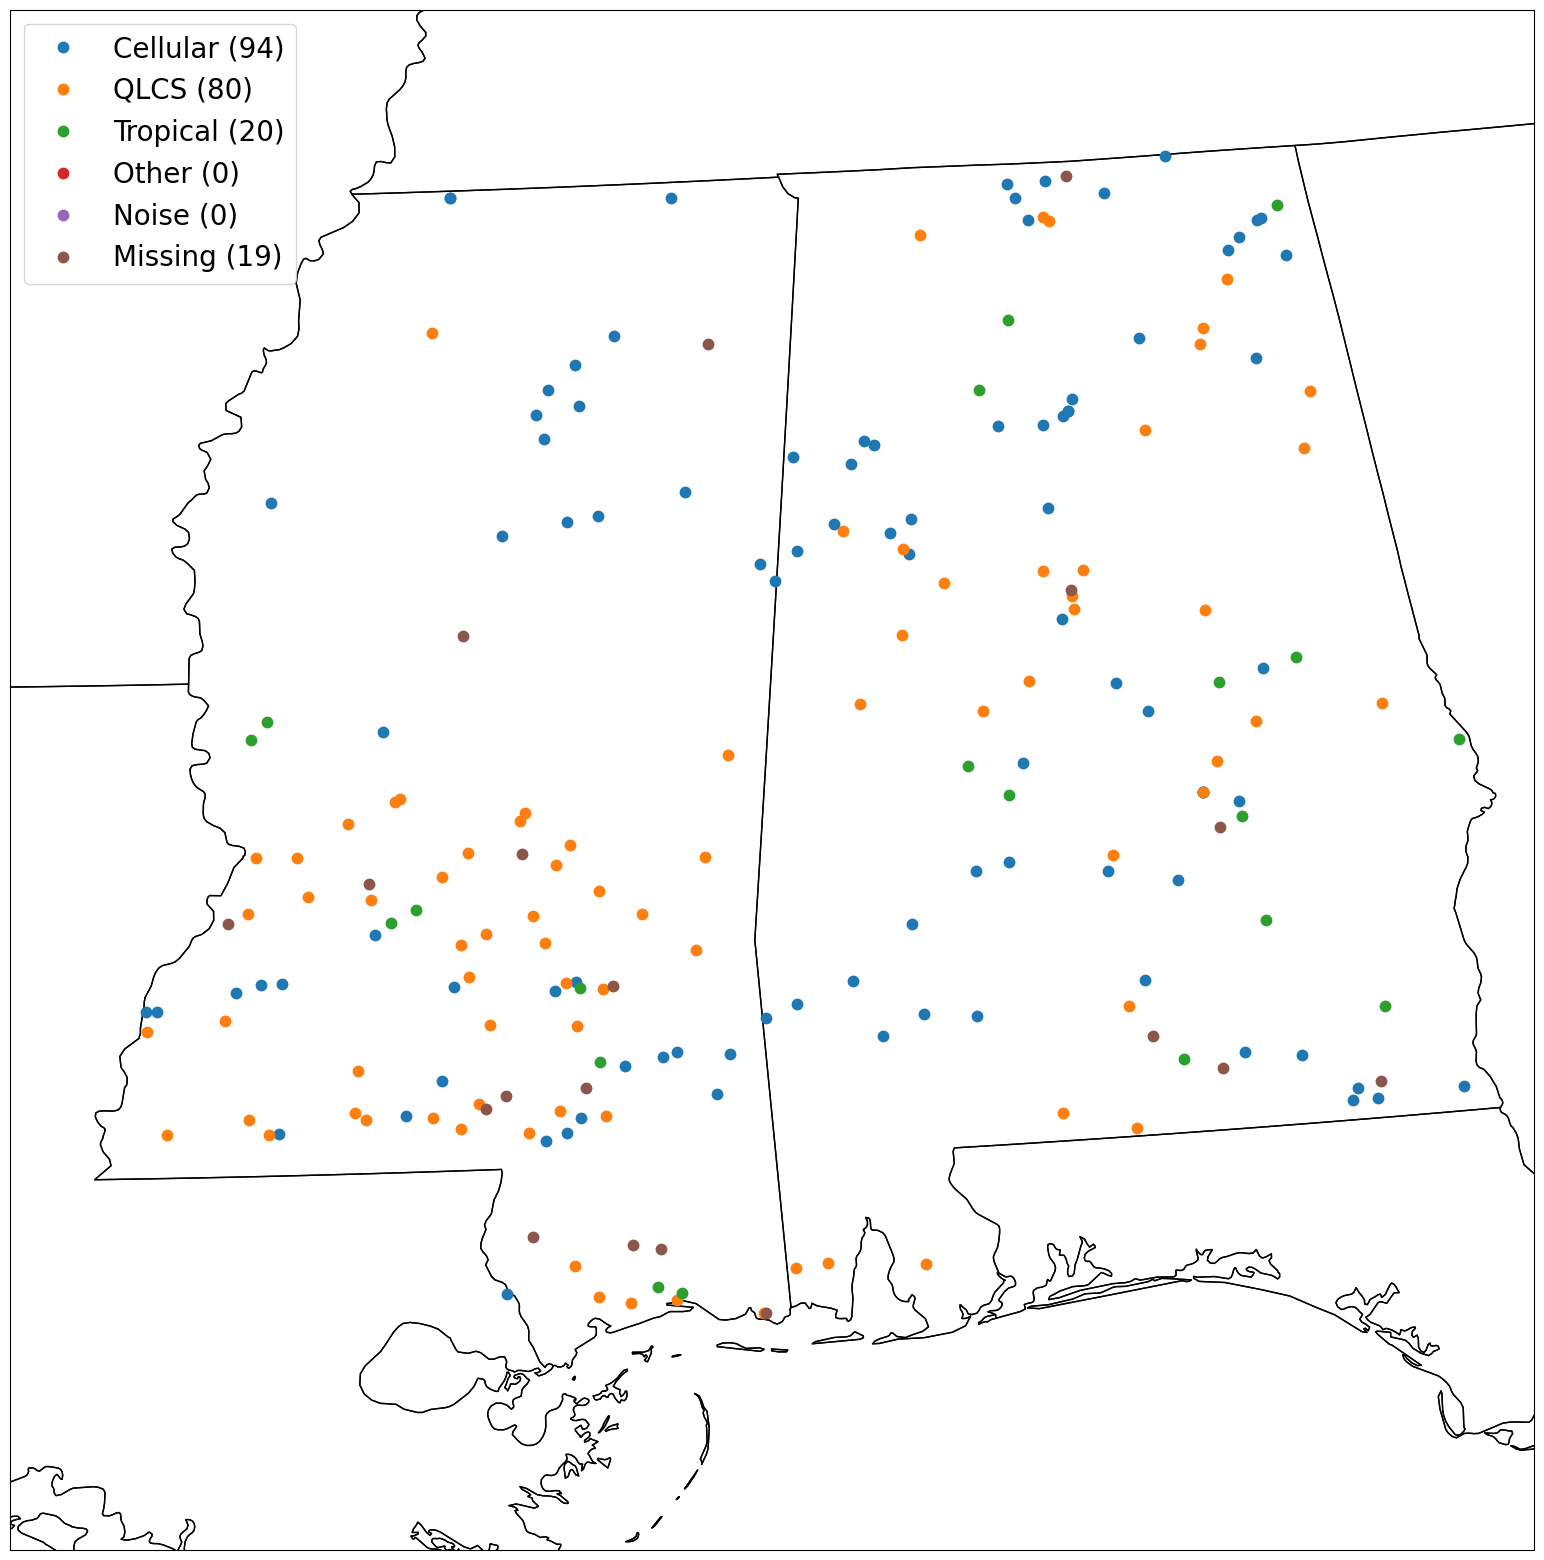

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 20

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=-93))
ax.set_extent([-92, -85, 29.5, 35.5])
ax.coastlines()
ax.add_feature(cfeature.STATES)

for index, cls in lookup.items():
    df_ = df_sub[df_sub.Classification==cls]
    
    plt.plot(df_.slon, df_.slat, '.', ms=15, label="{} ({})".format(cls, len(df_)), transform=ccrs.PlateCarree())
    
plt.legend(prop={"size":20})

# See which date had the most QLCS tornadoes

In [7]:
counts = df_sub[df_sub.Classification=='QLCS'].groupby(df_sub.date_utc.dt.date).count()

counts[['om']].sort_values('om', ascending=False)

,om
date_utc,
2009-03-26,12
2008-03-04,10
2011-03-09,7
2000-03-11,5
2013-03-18,4
2012-03-21,4
1996-03-19,3
2008-03-15,2
2016-03-02,2


# Download a few maps from svrimg (interface coming soon)

C:\Users\a1672958\AppData\Local\Temp\ipykernel_16052\1695517482.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread("tmp{}.png".format(idx))


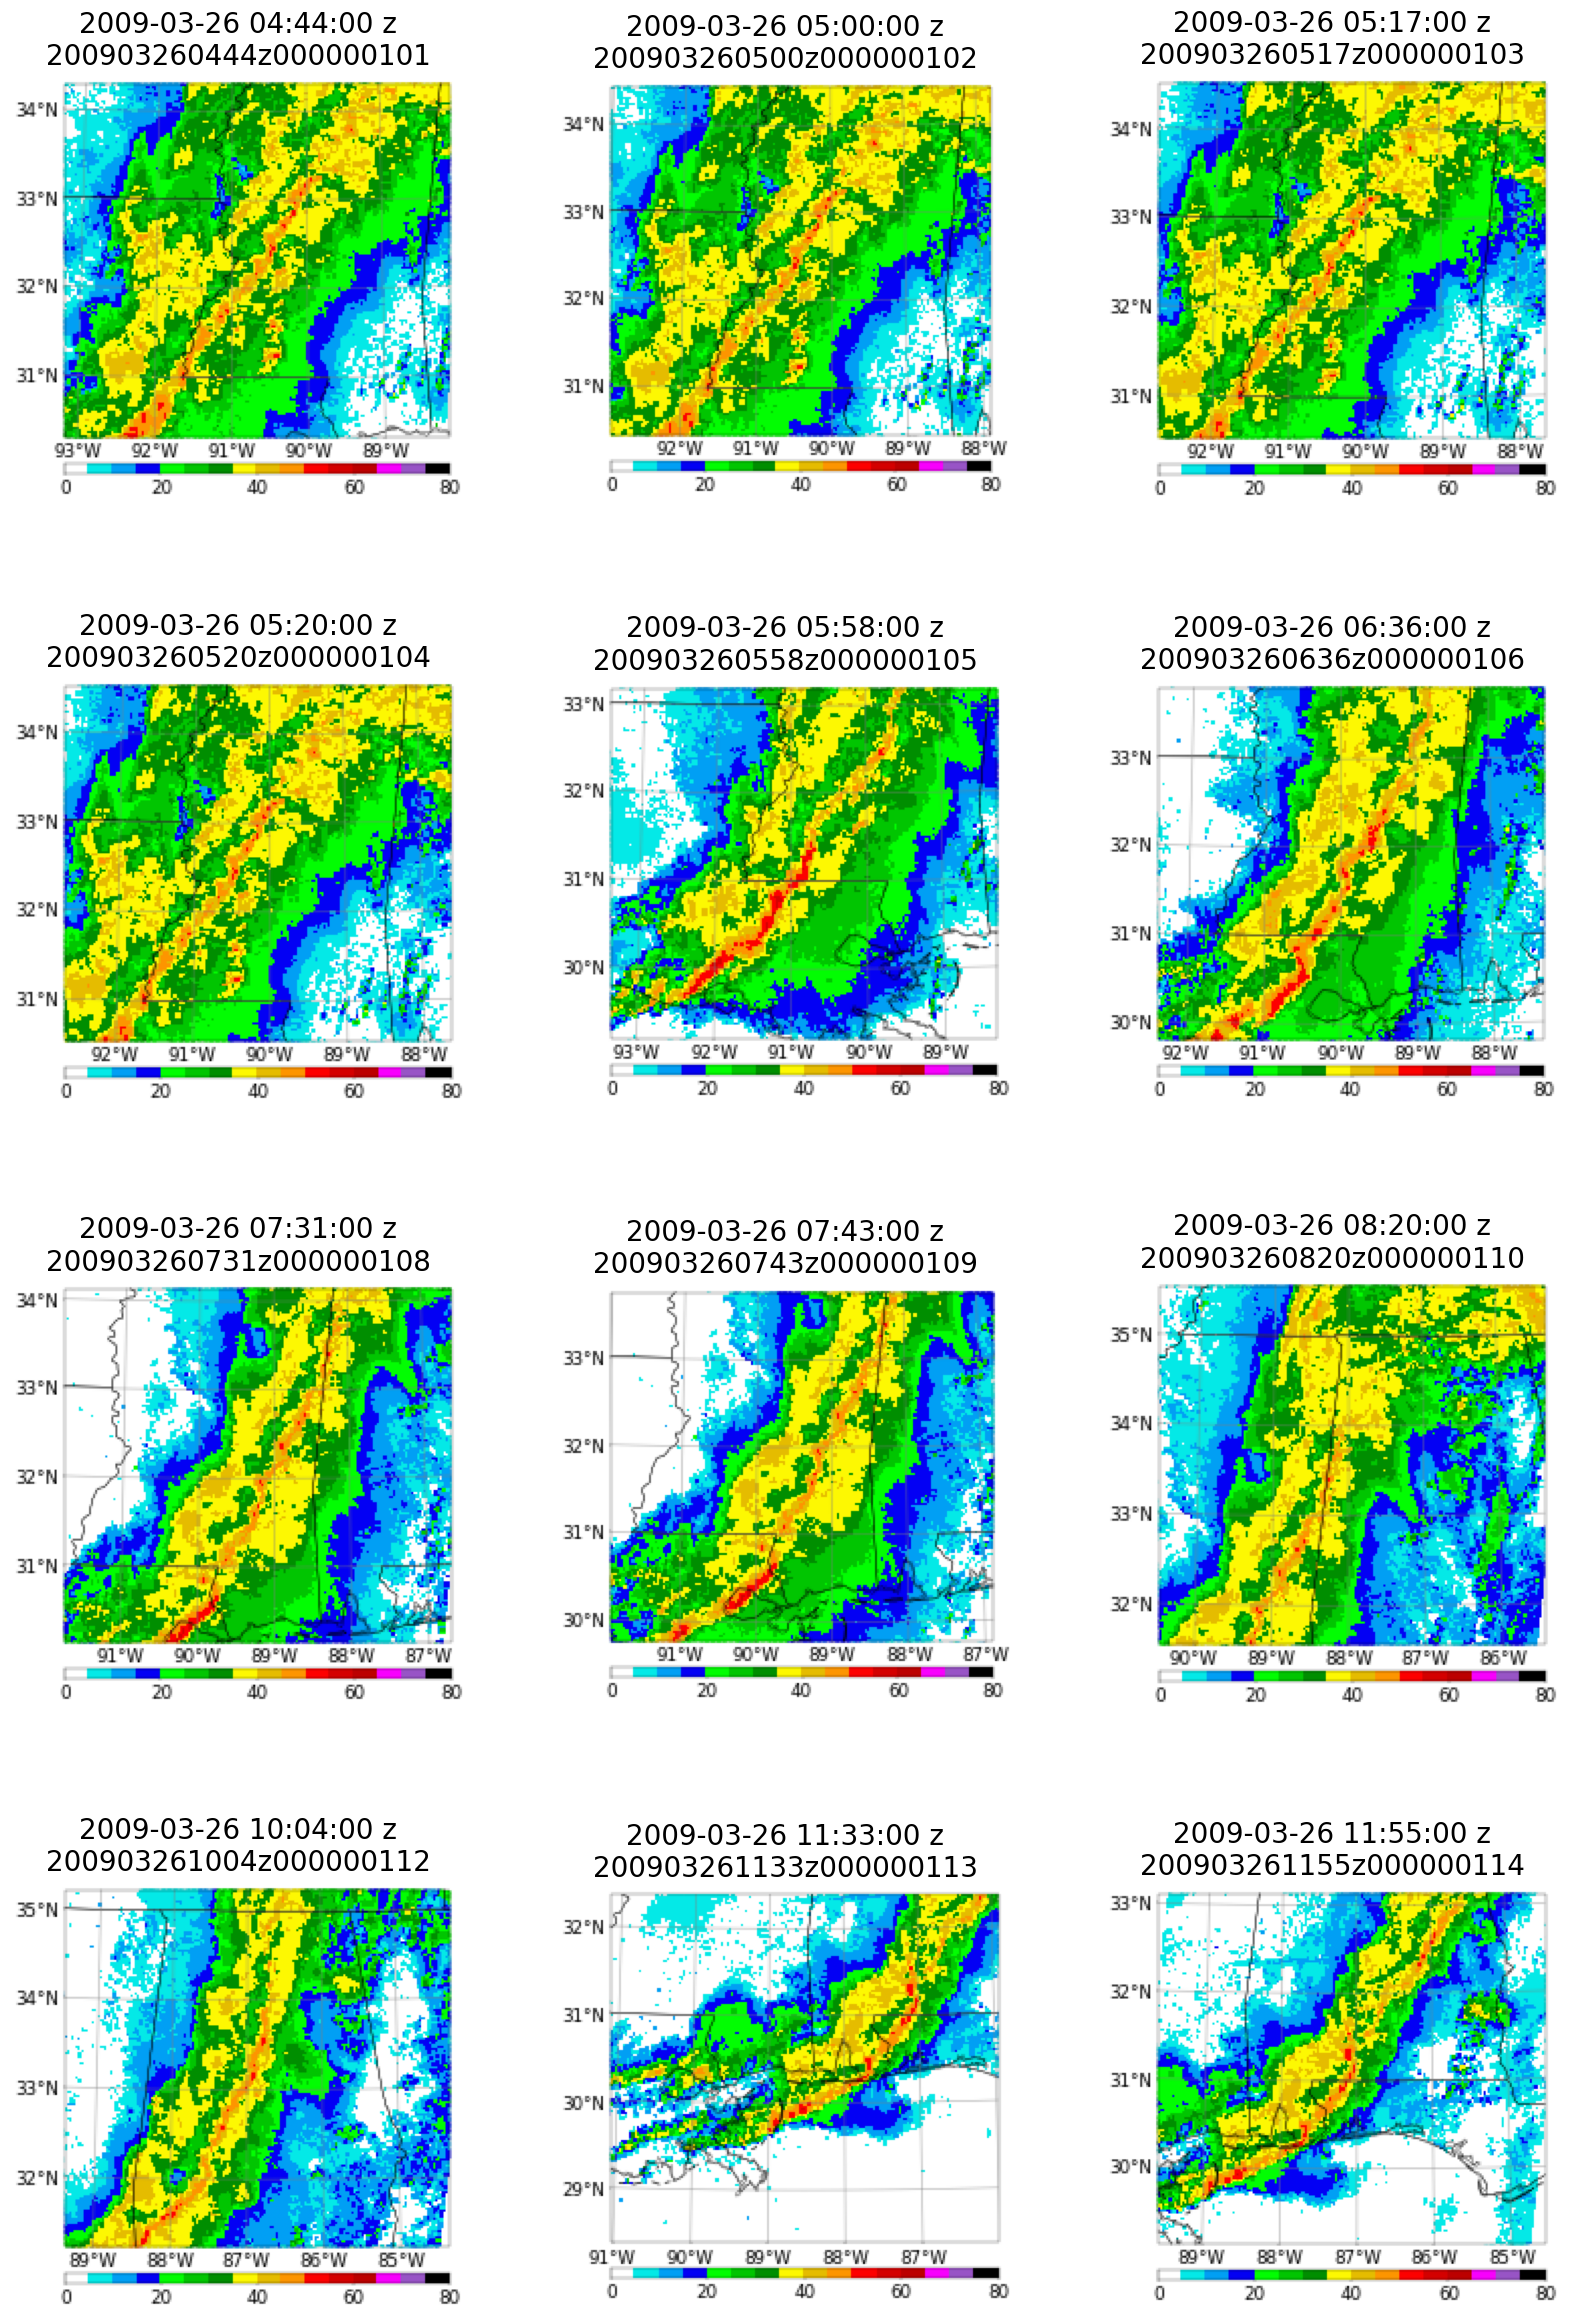

In [8]:
import urllib.request 
from imageio import imread

plt.rcParams['figure.figsize'] = 20, 30

top_url = "https://nimbus.niu.edu/svrimg/data/{}/{}.png"

df_ = df_sub[(df_sub.Classification=='QLCS') & (df_sub.mo==3) & (df_sub.dy==26) & (df_sub.yr==2009)]

for idx, (rid, row) in enumerate(df_.iterrows()):
    
    ax = plt.subplot(4, 3, idx+1)
    
    pic_url = top_url.format(row.yr, rid)
    
    response = urllib.request.urlretrieve(pic_url, "tmp{}.png".format(idx))
    
    img = imread("tmp{}.png".format(idx))
    
    ax.set_title(str(row.date_utc) + " z\n" + rid, fontsize=20)
    
    ax.imshow(img)
    plt.axis('off')